In [65]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [66]:
'''
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions
# Load the dataset and explore the variables. 
# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
# Extract the target variable.
Extract the independent variables and scale them.
Build the logistic regression model.
Evaluate the model.
Even a simple model will give us more than 70% accuracy. Why?
Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique
based on nearest neighbors that adds new points between existing points.
Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model.
Is it there any improvement?

'''

'\nWe will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.\n\nInstructions\n# Load the dataset and explore the variables. \n# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.\n# Extract the target variable.\nExtract the independent variables and scale them.\nBuild the logistic regression model.\nEvaluate the model.\nEven a simple model will give us more than 70% accuracy. Why?\nSynthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique\nbased on nearest neighbors that adds new points between existing points.\nApply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model.\nIs it there any improvement?\n\n'

In [86]:
df = pd.read_csv("customer_churn.csv")
display(df.head(5))
display(df.shape)
display(df.columns)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [107]:
y = df[["Churn"]].copy()
X = df[["tenure","SeniorCitizen","MonthlyCharges"]].copy()

In [104]:
display(X.head(1))
display(X.shape)

# column seniorCitizen is a boolean with 1 and 0. use encoder and not minmax
# minmax on tenure
# minmax on monthlyCharges as well?
# try showing heatmap
# try sns plot something, idk lets see

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85


(7043, 3)

 - X/y split first
 - then heatmap (?)
 - then train test
 - minmax
 - reset index? see lecture
 - encode
 - do logit (?)
 - logistic regression (?)

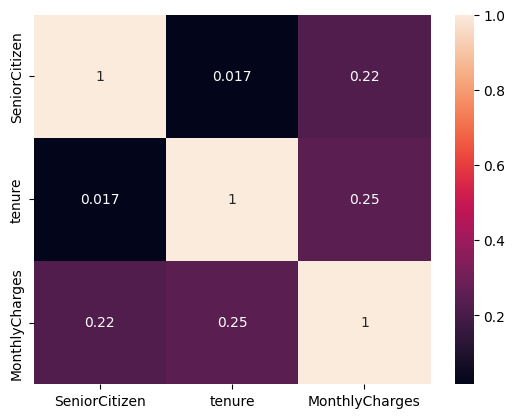

In [88]:
# now heatmap
correlations_matrix = df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# well

In [108]:
def to_10(row):
    if row["Churn"] == "Yes":
        return 1
    else:
        return 0
y = y.apply(to_10, axis = 1)
y = pd.DataFrame(y)

In [110]:
display(y.head(1))
display(y.value_counts())
display(y.shape)

,0
0,0


0    5174
1    1869
dtype: int64

(7043, 1)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2
# train test works. good

In [112]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [113]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_train_encoded = pd.DataFrame(y_train_encoded, columns = y_train.columns)
y_test_encoded = encoder.transform(y_test)
y_test_encoded = pd.DataFrame(y_test_encoded, columns = y_test.columns)
display(y_train_encoded.head(2))
display(y_train_encoded.value_counts())
display(y_test_encoded.head(2))
display(y_test_encoded.value_counts())


d:\Python 3.10\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python 3.10\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,0
1,0


0    3876
1    1406
dtype: int64

,0
0,0
1,0


0    1298
1     463
dtype: int64

In [114]:
y_train = y_train_encoded.reset_index(drop=True) 
y_test = y_test_encoded.reset_index(drop=True) 

In [115]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

d:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [116]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [117]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

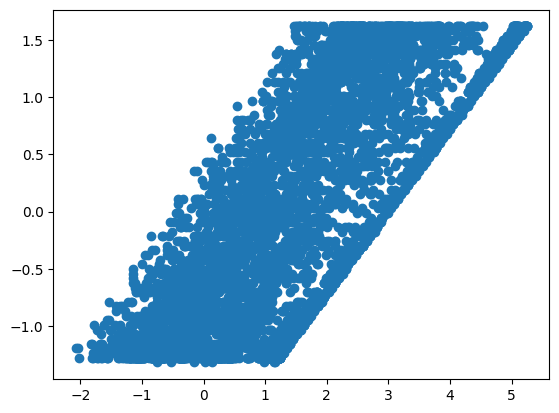

In [118]:
plt.scatter(logits,X_train_scaled['tenure'])

### there's a linear relation between logits and tenure

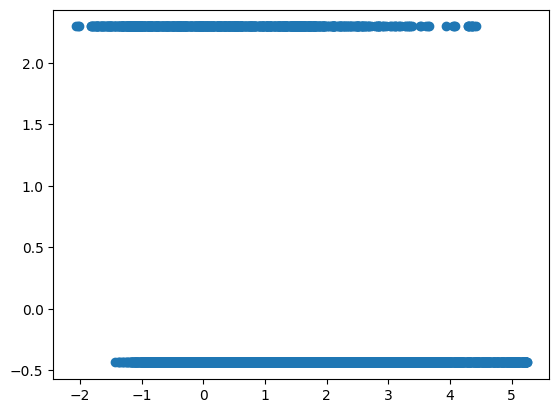

In [119]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

### not in SeniorCitizen though

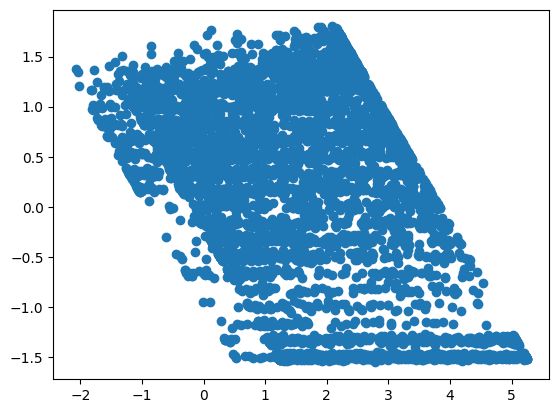

In [120]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

### and a negative relation in MonthlyCharges

In [121]:
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [122]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723
